In [57]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora

In [58]:
import os
import pandas as pd

In [59]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type="top2vec"
model_name="Top2Vec"
embedding_model = "preliminary"
data_type="np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"



folder_name = f"Preliminary-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
seed = 42
df = load_from_file(folder_path_data,file_name_data)

data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [60]:
topic_model = None

try:
    topic_model = Top2Vec.load(file_path)
except:
    topic_model = Top2Vec(documents=new_data)


In [61]:
topic_model.save(file_path)

In [62]:
print(topic_model.embedding_model)

doc2vec


In [63]:
num_topics = topic_model.get_num_topics()
print(num_topics)

25


In [64]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [65]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [66]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [67]:
topic_model.get_topics()

(array([['treng', 'mogleg', 'auka', ..., 'grunnlaget', 'nasjonale',
         'innstillinga'],
        ['saken', 'innstillingen', 'egentlig', ..., 'oppfatter', 'loven',
         'lov'],
        ['elever', 'lærere', 'fag', ..., 'tiltak', 'kvalitet', 'ansvar'],
        ...,
        ['helseministeren', 'takker', 'vedtaket', ..., 'vedkommende',
         'oppfattet', 'politiet'],
        ['frivillige', 'organisasjoner', 'organisasjonene', ...,
         'dessverre', 'takke', 'eksempler'],
        ['klimaforliket', 'fremmet', 'representantene', ...,
         'organisasjoner', 'barnehagene', 'eøsavtalen']], dtype='<U15'),
 array([[ 0.8938671 ,  0.8797087 ,  0.8792332 , ...,  0.44515556,
          0.4357868 ,  0.43414938],
        [ 0.68846077,  0.66411585,  0.6597573 , ...,  0.5140138 ,
          0.51252514,  0.51132655],
        [ 0.7853867 ,  0.77568126,  0.7432908 , ...,  0.51955944,
          0.5161467 ,  0.5152085 ],
        ...,
        [ 0.05476663,  0.02650186, -0.00122183, ..., -0.1569

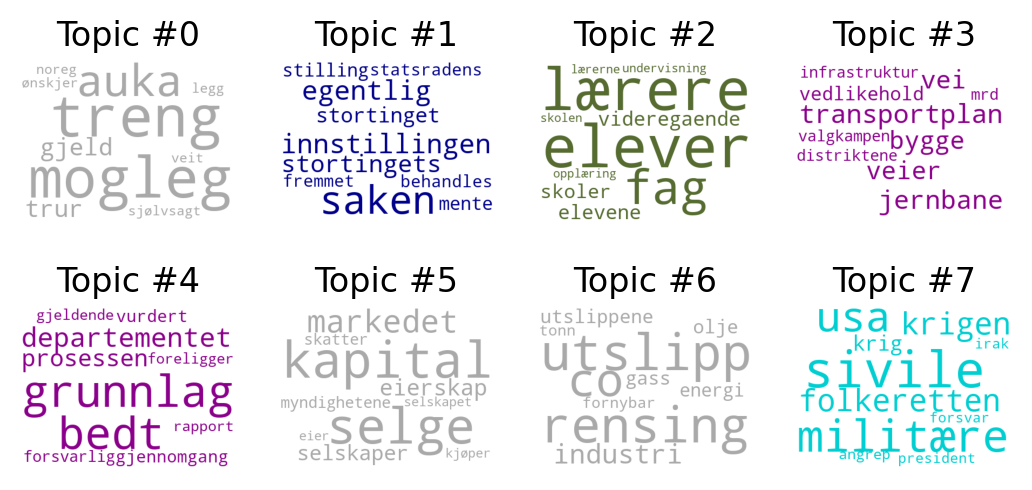

In [68]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores,num_topics,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [69]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'treng': 0.8938671, 'mogleg': 0.8797087, 'auka': 0.8792332, 'gjeld': 0.8660889, 'trur': 0.8545577, 'sjølvsagt': 0.84592956, 'legg': 0.8454618, 'noreg': 0.843936, 'veit': 0.8353148, 'ønskjer': 0.82374656, 'saka': 0.82074803, 'pengar': 0.80835426, 'høgre': 0.80780834, 'raudgrøne': 0.8076433, 'seie': 0.7939368, 'viktigaste': 0.77426314, 'auke': 0.7692739, 'leggje': 0.7675479, 'kristeleg': 0.74020094, 'regjeringa': 0.7376034, 'seia': 0.7330729, 'verda': 0.71242934, 'arbeidarpartiet': 0.7069801, 'veg': 0.70653355, 'framtida': 0.7056119, 'offentlege': 0.66849643, 'tida': 0.66013736, 'kommunar': 0.63504845, 'vekk': 0.628878, 'knytte': 0.62812006, 'kommunane': 0.61867714, 'omrade': 0.6068399, 'parti': 0.54942244, 'iallfall': 0.5433338, 'politikken': 0.5121222, 'menneske': 0.50494367, 'ord': 0.5012415, 'klarte': 0.49685404, 'toget': 0.49114856, 'tvert': 0.48976833, 'punkt': 0.48792064, 'modell': 0.4867929, 'verk': 0.4859353, 'innlegget': 0.46053025, 'utgangspunkt': 0.45877275, 'prosjekt': 

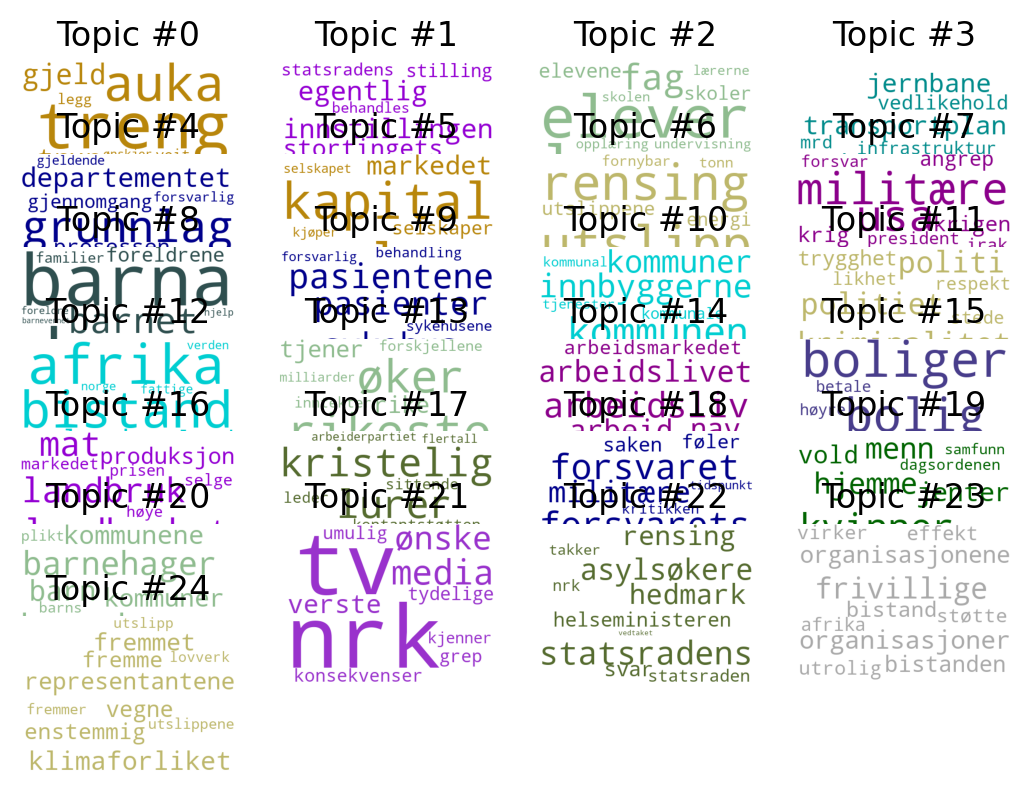

In [70]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [71]:
from utils.tables_and_plots import create_wordcloud

wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [72]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

folder_path_topics = r"preprocessed_data/results"

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [73]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [74]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [75]:
len(loaded_topics.values())

25

In [76]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [77]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [78]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('mogleg', 'treng') wordtuple
('mogleg', 'treng') wordup
17.0 over
7920.0 under
-8.863821873716633 -4.08746284125034 2.168538826644164 ('mogleg', 'treng') 17 90 88
('auka', 'treng') wordtuple
('auka', 'treng') wordup
34.0 over
7380.0 under
-7.7619422596974195 -5.08746284125034 1.525700039863048 ('auka', 'treng') 34 90 82
('gjeld', 'treng') wordtuple
('gjeld', 'treng') wordup
117.0 over
29970.0 under
-8.000866743817532 -6.870364719583405 1.1645475997819628 ('gjeld', 'treng') 117 90 333
('treng', 'trur') wordtuple
('treng', 'trur') wordup
51.0 over
14400.0 under
-8.141355849245542 -5.672425341971496 1.435251300533812 ('treng', 'trur') 51 90 160
('sjølvsagt', 'treng') wordtuple
('sjølvsagt', 'treng') wordup
65.0 over
10530.0 under
-7.339850002884625 -6.022367813028454 1.2187648165570364 ('sjølvsagt', 'treng') 65 90 117
('legg', 'treng') wordtuple
('legg', 'treng') wordup
30.0 over
6390.0 under
-7.734709620225839 -4.906890595608519 1.576295511285316 ('legg', 'treng') 30 90 71
('noreg', 

In [79]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

representanten harald tom nesvik bad ordet naturlig kommentere sonja sjøli betraktningene representantene unyanserte framstiller regjeringen regjeringspartiene generelt motstandere private tjenester opposisjonen høyre fremskrittspartiet bilde stemmer dårlig virkeligheten innførte fastlegeordningen måter drevet arbeiderpartiet sv utgangspunktet kommuneleger fast ansatt kommuner privatpraktiserende selvstendig næringsdrivende arbeidsgiveransvar avtaler inngått privatpraktiserende spesialister høyre fremskrittspartiet utnytte kapasiteten hovedsak sv arbeiderpartiet fylkeskommunene helseforetakene privatpraktiserende spesialistene skummet fløten helsemarkedet forpliktelser forpliktelser refusjonstilskudd ventelistene ventelistene forpliktet måte verste eksemplene frihet ansvar fremskrittspartiet foreslått refusjonsordning privatpraktiserende spesialister knytter forpliktelser pasienter behandle framstillingen partiene blottet refleksjoner forhold bruken offentlige midler nødt gir midler gi

In [80]:
diversity

0.9

In [81]:
coherence

-0.10075989821937935

In [82]:
from tabulate import tabulate
import csv

In [83]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════════╤═══════════╤══════════╕
│ Model                                 │ Metric    │    Value │
╞═══════════════════════════════════════╪═══════════╪══════════╡
│ top2vec_preliminary_np_mini_stopwords │ coherence │ -0.10076 │
├───────────────────────────────────────┼───────────┼──────────┤
│ top2vec_preliminary_np_mini_stopwords │ diversity │  0.9     │
╘═══════════════════════════════════════╧═══════════╧══════════╛


In [84]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})